# Hofstadter

In [237]:
import sys
sys.path.insert(0, './Hofstadter/')
from Hofstadter_Matrix_in_k_space import *

In [285]:
# Discreatizing Brillioun Zone
Nkx = 20
Nky = 20

p=1
q=5

kkx=np.linspace(0,2.*np.pi/q,Nkx,endpoint=False) 
kky=np.linspace(0,2.*np.pi,Nky,endpoint=False) 

In [ ]:
# Eigenvalues and Eigenenergies of Matrix
EEA=np.empty([Nkx,Nky,q])
UUA=np.empty([Nkx,Nky,q,q],dtype=complex)
phi=p/q
for ikx, kx in enumerate(kkx):
    for iky, ky in enumerate(kky):
        EEA[ikx,iky,:],UUA[ikx,iky,:,:] = np.linalg.eigh(H(p,q,kx,ky))

Text(0.5, 1.0, 'q=5')

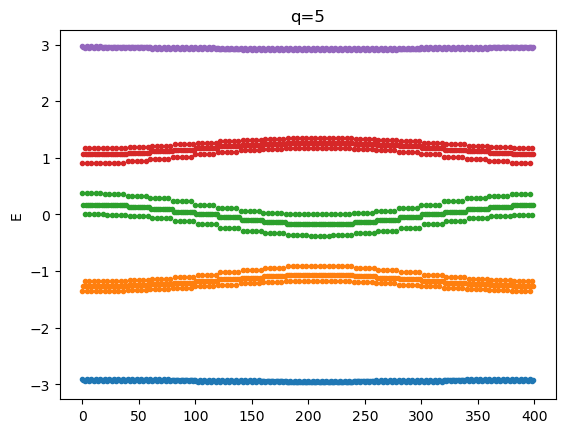

In [287]:
# Plot Energy Bands
import matplotlib.pyplot as plt
for i in range(q):
        plt.plot(EEA[:,:,i].flatten(),'.') 
plt.ylabel("E")
plt.title("q="+str(q))

In [288]:
# Diklik Bağıntısı
np.dot(np.conj(UUA[1,0,:,1]),UUA[1,0,:,1])

(0.9999999999999989+0j)

In [289]:
for bi in range(q): 
    # Caculate The Link Variables
    bj = bi # Band index  
    U1=np.zeros([Nkx,Nky],dtype=complex)
    U2=np.zeros([Nkx,Nky],dtype=complex)
    for ikx in range(Nkx):
        for iky in range(Nky):
            s1=np.dot(np.conj(UUA[ikx,iky,:,bi]),UUA[np.mod(ikx+1,Nkx),iky,:,bj]) 
            s2=np.dot(np.conj(UUA[ikx,iky,:,bj]),UUA[ikx,np.mod(iky+1,Nky),:,bi]) 
            U1[ikx,iky]=s1/np.abs(s1)
            U2[ikx,iky]=s2/np.abs(s2)
    # Calculate The Field Strength
#     F12=np.zeros([Nkx,Nky],dtype=complex) 
#     for ikx,kx in enumerate(kkx):
#         for iky,ky in enumerate(kky):
#             F12[ikx,iky] = U1[ikx,iky]*U2[np.mod(ikx+1,Nkx),iky]/(U1[ikx,np.mod(iky+1,Nky)]*U2[ikx,iky])
#             F12[ikx,iky] = np.log(F12[ikx,iky])
    # Alternative F12 Calculation
    F12=np.log( U1*np.roll(U2,-1,axis=0)*np.conj(np.roll(U1,-1,axis=1)*U2) )
    # Chern Number of Band Index
    print("Band Index:",bi)
    print(F12.sum()/(2j*np.pi))

Band Index: 0
(1.0000000000000002-9.365995931663545e-16j)
Band Index: 1
(1.0000000000000002+2.8024700688395743e-16j)
Band Index: 2
(-4+6.20739327651208e-16j)
Band Index: 3
(1+8.922853887349917e-16j)
Band Index: 4
(1.0000000000000002+6.171617644950244e-16j)


In [300]:
def calc_link_var(ψk1, ψk2):
    #return np.exp( 1j*np.angle( np.dot(np.conj(ψk1),ψk2) ) )
    s1 = np.dot(np.conj(ψk1),ψk2)
    return s1/np.abs(s1)
    
def calc_link_vars_BZ(UUA,bi):
    N1, N2 = UUA.shape[0:2]
    UU=np.zeros([N1,N2,2],dtype=complex)
    dirs = [[1,0], [0,1]]
    for i1 in range(N1):
        for i2 in range(N2):
            for idir, vdir in enumerate(dirs):
                    UU[i1,i2,idir] = calc_link_var(UUA[i1                   ,i2               ,:,bi],
                                                   UUA[np.mod(i1+vdir[0],N1),np.mod(i2+vdir[1],N2),:,bi])
    return UU        

def calc_F12_BZ(UU):
    return np.log( UU[:,:,0]*
                   np.roll(UU[:,:,1],-1,axis=0)*
                   np.conj(np.roll(UU[:,:,0],-1,axis=1)*
                   UU[:,:,1]) )

def calc_F12_BZ_2(UU):
    return np.log( UU[:,:,0]*
                   np.roll(UU[:,:,1],-1,axis=0)/(
                   np.roll(UU[:,:,0],-1,axis=1)*
                   UU[:,:,1] ) )

In [301]:
for bi in range(q):
    UU = calc_link_vars_BZ(UUA,bi)
    F12 = calc_F12_BZ(UU)
    F12_2 = calc_F12_BZ_2(UU)
    print("   Band Index:",bi)
    print(f'{F12.sum()/(2j*np.pi):.2e}, {F12_2.sum()/(2j*np.pi):.2e} ')

   Band Index: 0
-1.00e+00+4.06e-16j, -1.00e+00+2.56e-16j 
   Band Index: 1
-1.94e-16+4.98e-16j, -1.94e-16+4.68e-16j 
   Band Index: 2
1.00e+00-8.42e-17j, 1.00e+00-3.02e-16j 


# Kagome

In [302]:
sys.path.insert(0, './Kagome/')
from Kagome_Matrix_in_k_space import *

In [303]:
# Eigenvalues and Eigenenergies of Matrix
q = 3 # Dimension of Matrix = 3
EEA=np.zeros([Nkx,Nky,q])
UUA=np.zeros([Nkx,Nky,q,q],dtype=complex)
for ikx in range(Nkx):
    for iky in range(Nky):
        kx,ky=ikx/Nkx*b1+iky/Nky*b2
        k1=np.dot([kx,ky],a1_b);k2=np.dot([kx,ky],a2_b);k3=k2-k1 # Convention
        EEA[ikx,iky,:],UUA[ikx,iky,:,:] = np.linalg.eigh(Hamiltonian(k1,k2,k3))

In [304]:
for bi in range(q):
    UU = calc_link_vars_BZ(UUA,bi)
    F12 = calc_F12_BZ(UU)
    F12_2 = calc_F12_BZ_2(UU)
    print("    Band Index:",bi)
    print(f'{F12.sum()/(2j*np.pi):.2e}, {F12_2.sum()/(2j*np.pi):.2e} ')

    Band Index: 0
-1.00e+00+4.06e-16j, -1.00e+00+2.56e-16j 
    Band Index: 1
-1.94e-16+4.98e-16j, -1.94e-16+4.68e-16j 
    Band Index: 2
1.00e+00-8.42e-17j, 1.00e+00-3.02e-16j 
